In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [11]:
all_files = glob.glob("*Sampling_Evaluation*.csv")
descr_files = glob.glob("descr_*.txt")
speakermap_files = glob.glob("*_SpeakerMap.txt")
speeches = sorted(speeches)
descr_files = sorted(descr_files)
speakermap_files = sorted(speakermap_files)

In [135]:
titles = ["baseline", "approach2_business","approach1_business"]
final_dict = []
plot_dict = []
final_dict_ten = []
final_dict_twe = []

for title in titles:
    files = [x for x in all_files if title in x.lower()]
    coherence_mean = 0
    relevance_mean = 0
    coherence_median = 0
    relevance_median = 0
    nr_mean = 0
    consistency_mean = 0
    correctness_mean = 0
    nr_median = 0
    consistency_median = 0
    correctness_median = 0
    ten_coherence_mean = 0
    ten_relevance_mean = 0
    ten_coherence_median = 0
    ten_relevance_median = 0
    twe_coherence_mean = 0
    twe_relevance_mean = 0
    twe_coherence_median = 0
    twe_relevance_median = 0
    
    for file in files:
        df = pd.read_csv(file)
        coherence_mean += df["Coherence"].mean()
        relevance_mean += df["Relevance"].mean()
        coherence_median += df["Coherence"].median()
        relevance_median += df["Relevance"].median()
        nr_mean += df["Non-redundancy"].mean()
        consistency_mean += df["Consistency"].mean()
        correctness_mean += df["Correctness"].mean()
        nr_median += df["Non-redundancy"].median()
        consistency_median += df["Consistency"].median()
        correctness_median += df["Correctness"].median()
        
        
    
        ten_coherence_mean += df[df["ten"]==1]["Coherence"].mean()
        ten_relevance_mean += df[df["ten"]==1]["Relevance"].mean()
        ten_coherence_median += df[df["ten"]==1]["Coherence"].median()
        ten_relevance_median += df[df["ten"]==1]["Relevance"].median()
        
        twe_coherence_mean += df[df["ten"]!=1]["Coherence"].mean()
        twe_relevance_mean += df[df["ten"]!=1]["Relevance"].mean()
        twe_coherence_median += df[df["ten"]!=1]["Coherence"].median()
        twe_relevance_median += df[df["ten"]!=1]["Relevance"].median()
    
    final_coherence_mean = coherence_mean/len(files)
    final_relevance_mean = relevance_mean/len(files)
    final_nr_mean = nr_mean/len(files)
    final_consistency_mean = consistency_mean/len(files)
    final_correctness_mean = correctness_mean/len(files)
    
    final_coherence_median = int(coherence_median/len(files))
    final_relevance_median = int(relevance_median/len(files))
    
    final_ten_coherence_mean = ten_coherence_mean/len(files)
    final_ten_relevance_mean = ten_relevance_mean/len(files)
    final_ten_coherence_median = int(ten_coherence_median/len(files))
    final_ten_relevance_median = int(ten_relevance_median/len(files))
    final_twe_coherence_mean = twe_coherence_mean/len(files)
    final_twe_relevance_mean = twe_relevance_mean/len(files)
    final_twe_coherence_median = int(twe_coherence_median/len(files))
    final_twe_relevance_median = int(twe_relevance_median/len(files))
    
    final_dict.append({"model": title.split("_")[0], "coherence_mean": final_coherence_mean, "relevance_mean": final_relevance_mean, "non_red_mean":final_nr_mean, "consistency_mean": final_consistency_mean, "correctness_mean": final_correctness_mean})
    plot_dict.append({"model": title.split("_")[0], "coherence_mean": final_coherence_mean, "relevance_mean": final_relevance_mean, "coherence_median": final_coherence_median, "relevance_median": final_relevance_median})
    final_dict_ten.append({"model": title.split("_")[0], "coherence_mean": final_ten_coherence_mean, "relevance_mean": final_ten_relevance_mean, "coherence_median": final_ten_coherence_median, "relevance_median": final_ten_relevance_median})
    final_dict_twe.append({"model": title.split("_")[0], "coherence_mean": final_twe_coherence_mean, "relevance_mean": final_twe_relevance_mean, "coherence_median": final_twe_coherence_median, "relevance_median": final_twe_relevance_median})
    
    
    
    



In [136]:
final_twe = pd.DataFrame(final_dict_twe)
final_ten.sort_index()

,model,coherence_mean,relevance_mean,coherence_median,relevance_median
0,baseline,3.758333,4.077778,4,4
1,approach2,4.450000,4.425000,4,4
2,approach1,3.250000,3.283333,3,3


In [143]:
df_random = pd.DataFrame(plot_dict).reindex([0, 2, 1])
df_random.model = ["Baseline", "PPLM Approach 1", "PPLM Approach 2"]

In [122]:
final_twe.sort_values(by="relevance_mean", inplace=True)

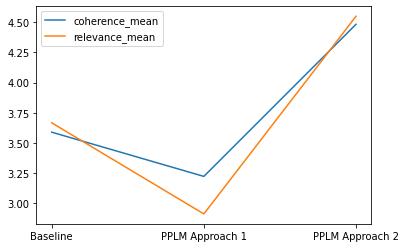

<Figure size 432x288 with 0 Axes>

In [146]:
plot_(df_random,"final_plot")

In [124]:
import matplotlib.pyplot as plt
import numpy as np
def plot_(plot_dict, file):
    x = range(len(plot_dict))
    my_xticks = plot_dict["model"]
    plt.xticks(x, my_xticks)

    y_1 = plot_dict["coherence_mean"]
    y_2 = plot_dict["relevance_mean"]

    plt.plot(x, y_1, label="coherence_mean")
    plt.plot(x, y_2, label="relevance_mean")
    plt.legend()

    plt.show()
    plt.savefig(f"{file}.png")

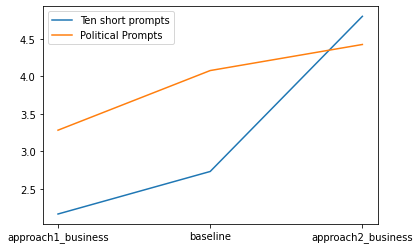

In [125]:
x = range(len(final_ten))
my_xticks = final_ten["model"]
plt.xticks(x, my_xticks)

y_1 = final_ten["relevance_mean"]
y_2 = final_twe["relevance_mean"]

plt.plot(x, y_1, label="Ten short prompts")
plt.plot(x, y_2, label="Political Prompts")
plt.legend()

plt.show()

In [126]:
final_ten


,model,coherence_mean,relevance_mean,coherence_median,relevance_median
2,approach1_business,3.166667,2.166667,3,1
0,baseline,3.144444,2.733333,3,2
1,approach2_business,4.550000,4.800000,4,5


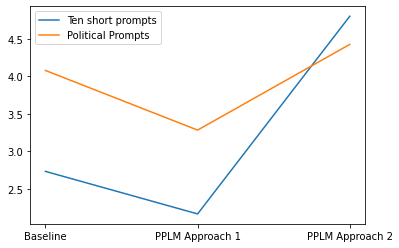

In [133]:
# x = range(len(final_ten))
# my_xticks = final_ten["model"]
# plt.xticks(x, my_xticks)

# y_1 = final_ten["relevance_mean"]
# y_2 = final_twe["relevance_mean"]

final_ten_reordered.model = ["Baseline", "PPLM Approach 1", "PPLM Approach 2"]
final_twe_reordered.model = ["Baseline", "PPLM Approach 1", "PPLM Approach 2"]

plt.plot(final_ten_reordered.model, final_ten_reordered.relevance_mean, label="Ten short prompts")
plt.plot(final_twe_reordered.model, final_twe_reordered.relevance_mean, label="Political Prompts")
plt.legend()

plt.show()